## Kankamon Thaweephol (60199130056)

## Burger King Nutrition Fact & Multiple linear regression 

การวิเคราะห์หาสมการถดถอยเชิงเส้นชนิดหลายตัวแปร (multiple linear regression) โดยใช้ชุดข้อมูล
hw01_burger_king_nutrition_fact_sheet.csv (https://www.bk.com/pdfs/nutrition.pdf) เพื่อแสดงความสัมพันธ์ระหว่างปริมาณแคลอรี่(Calories) และสารอาหารต่างๆ

### Data Wrangling and Pre-processing

#### 1. ทำการอิมพอร์ตเพ็กเก็จและกำหนดค่าต่างๆที่จำเป็น

In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import zscore

#### 2. เปลี่ยนไดเร็กทอรี่ไปที่ไดเร็กทอรี่ที่มีไฟล์ชุดข้อมูลอยู่และทำการอ่านไฟล์ชุดข้อมูลไปเก็บไว้ในตัวแปรชื่อ df

In [2]:
os.getcwd()

'C:\\Users\\kik\\Desktop\\it525_2_2017_hw01'

In [3]:
path = os.chdir('C:\\Users\\kik\\Desktop\\it525_2_2017_hw01\\dataset')

In [4]:
os.getcwd()

'C:\\Users\\kik\\Desktop\\it525_2_2017_hw01\\dataset'

In [5]:
filename = 'hw01_burger_king_nutrition_fact_sheet.csv'

In [6]:
df = pd.read_csv(filename)

In [7]:
df.head()

,Nutrition facts,serving size (g),Calories,Calories from fat,Total fat (g),Saturated Fat (g),Trans Fat (g),Chol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Total Sugar (g),Protein (g)
0,WHOPPER® Sandwiches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WHOPPER® Sandwich,270,660.0,360.0,40.0,12.0,1.5,90.0,980.0,49,2.0,11.0,28.0
2,w/o Mayo,249,500.0,200.0,22.0,9.0,1.5,80.0,840.0,49,2.0,11.0,28.0
3,WHOPPER® Sandwich with Cheese,292,740.0,420.0,46.0,16.0,2.0,115.0,1340.0,50,2.0,11.0,32.0
4,w/o Mayo,271,580.0,260.0,29.0,13.0,1.5,105.0,1200.0,50,2.0,11.0,32.0


#### 3. แสดงจำนวนแถวและจำนวนคอลัมน์ของชุดข้อมูล

In [8]:
len(df)

210

In [9]:
len(df.columns)

13

In [10]:
df.shape

(210, 13)

#### 4. แสดงรายชื่อคอลัมน์ที่มีอยู่ในชุดข้อมูล

In [11]:
df.columns

Index(['Nutrition facts', ' serving size (g)', ' Calories',
       ' Calories from fat', ' Total fat (g)', ' Saturated Fat (g)',
       ' Trans Fat (g)', ' Chol (mg)', ' Sodium (mg)', ' Total Carb (g)',
       ' Dietary Fiber (g)', ' Total Sugar (g)', ' Protein (g)'],
      dtype='object')

In [12]:
df

,Nutrition facts,serving size (g),Calories,Calories from fat,Total fat (g),Saturated Fat (g),Trans Fat (g),Chol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Total Sugar (g),Protein (g)
0,WHOPPER® Sandwiches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WHOPPER® Sandwich,270,660.0,360.0,40.0,12.0,1.5,90.0,980.0,49,2.0,11.0,28.0
2,w/o Mayo,249,500.0,200.0,22.0,9.0,1.5,80.0,840.0,49,2.0,11.0,28.0
3,WHOPPER® Sandwich with Cheese,292,740.0,420.0,46.0,16.0,2.0,115.0,1340.0,50,2.0,11.0,32.0
4,w/o Mayo,271,580.0,260.0,29.0,13.0,1.5,105.0,1200.0,50,2.0,11.0,32.0
5,Bacon & Cheese WHOPPER® Sandwich,303,790.0,460.0,51.0,17.0,2.0,125.0,1560.0,50,2.0,11.0,35.0
6,BBQ Bacon WHOPPER® Sandwich,303,800.0,460.0,51.0,17.0,2.0,125.0,1540.0,53,2.0,14.0,35.0
7,DOUBLE WHOPPER® Sandwich,354,900.0,520.0,58.0,20.0,3.0,175.0,1050.0,49,2.0,11.0,48.0
8,w/o Mayo,333,740.0,360.0,40.0,17.0,2.5,165.0,910.0,49,2.0,11.0,47.0
9,DOUBLE WHOPPER® Sandwich with Cheese,377,980.0,580.0,64.0,24.0,3.0,195.0,1410.0,50,2.0,11.0,52.0


#### 5. ทำการลบช่องว่างที่อยู่หน้าชื่อคอลัมน์ออก เพื่อว่าเวลาอ้างถึงชื่อคอลัมน์จะได้ใช้ชื่อตรงๆได้เลยไม่ต้องพิมพ์ช่องว่าง

In [13]:
df.columns = map(lambda x: x.strip(), df.columns.values)

In [14]:
df.columns

Index(['Nutrition facts', 'serving size (g)', 'Calories', 'Calories from fat',
       'Total fat (g)', 'Saturated Fat (g)', 'Trans Fat (g)', 'Chol (mg)',
       'Sodium (mg)', 'Total Carb (g)', 'Dietary Fiber (g)', 'Total Sugar (g)',
       'Protein (g)'],
      dtype='object')

#### 6. นับจำนวนอาหารในชนิด burger, sandwich, salad, และ beverage พร้อมทั้งแสดงภาพโดยใช้ bargraph และ pie chart

- นับจำนวนอาหารที่มีอยู่ในแต่ละชนิดที่เป็น burger, sandwich, salad, และ beverage

In [15]:
mydict = dict()

In [16]:
mydict['burger'] = len(df[df['Nutrition facts'].str.contains('burger|Burger')])

In [17]:
mydict['sandwich'] = len(df[df['Nutrition facts'].str.contains('Sandwich|Sandwiches')])

In [18]:
mydict['salad'] = len(df[df['Nutrition facts'].str.contains('Salad|salad')])

In [19]:
mydict['beverage'] = len(df[df['Nutrition facts'].str.contains('Milk|Juice|Shake|Smoothie|Tea|Lemonade|Coke|Coca Cola|Orange|Punch|Sprite|Beer|Pepper')])

In [20]:
mydict

{'beverage': 26, 'burger': 13, 'salad': 6, 'sandwich': 14}

- สร้าง bar graph และ pie chart เพื่อแสดงสัดส่วนจำนวนอาหารที่มีอยู่ในแต่ละชนิด โดยให้กราฟทั้งสองอยู่ใน figure เดียวกัน แต่คนละ subplots

In [21]:
import matplotlib.pyplot as plt

In [22]:
%matplotlib inline

In [23]:
fig = plt.figure()

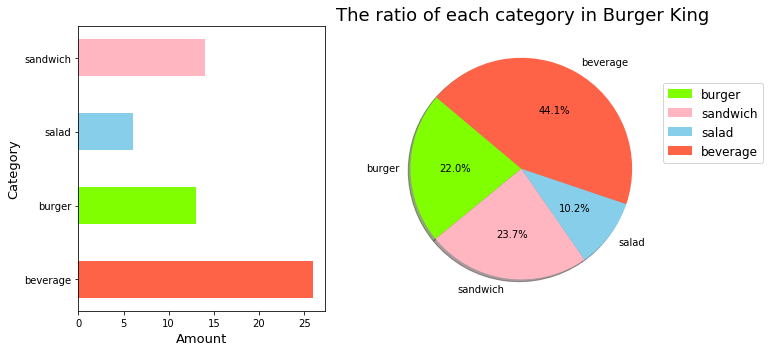

In [24]:
fig, axis = plt.subplots(1, 2, figsize=(10, 5))
category=['burger', 'sandwich', 'salad', 'beverage']
mydict = [13, 14, 6, 26]
plt.title('The ratio of each category in Burger King', fontsize = 18)
axis[0].set_xlabel('Amount',fontsize = 13)
axis[0].set_ylabel('Category', fontsize = 13)
axis[0].barh(category, mydict, height=0.5, align='center', color=['chartreuse','lightpink','skyblue','tomato'])

pcolors = ['chartreuse', 'lightpink', 'skyblue', 'tomato']
axis[1].pie(mydict, labels=category, autopct='%1.1f%%', startangle=140, shadow=True, colors=pcolors, )
axis[1].axis('equal')
axis[1].legend(loc = 'lower right', fontsize = 12, bbox_to_anchor = (1.5, 0.5))
fig.tight_layout()

#### 7. ทำการแทนค่าข้อมูลใน cell ที่มีแต่ช่องว่าง (whitespace) อย่างเดียวด้วย NaN —เนื่องจากข้อมูลในชุดข้อมูลอาจมีข้อมูลที่เป็นช่องว่าง (whitespace) อย่างเดียว อยู่โดยอาจจะเป็นความตั้งใจหรือความผิดพลาดของการป้อนข้อมูล หรือสร้างชุดข้อมูลขึ้นมา ซึ่งทำให้โปรแกรมคิดว่ามันเป็นข้อมูลชนิดหนึ่ง ไม่ใช่ข้อมูลที่ขาดหาย (missing value)

- แทนค่าข้อมูลที่เป็นช่องว่างอย่างเดียวด้วย NaN เช่น ในไฟล์csv แทนที่,' ', ด้วย ,NaN,

In [25]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

- แสดงจำนวนแถวของข้อมูลที่มีค่า NaN อยู่อีกครั้ง

In [26]:
len(df[df.isnull().any(axis=1)])

94

#### 8. ลบแถวข้อมูลที่มีค่า NaN อยู่ไม่ว่าจะมีแค่คอลัมน์เดียวหรือทุกคอลัมน์ในแถวข้อมูลนั้นๆ

- แสดงลิสต์ของ row indices ที่มีค่า NaN

In [27]:
r_index = df[df.isnull().any(axis=1)].index.tolist()

- แสดงจำนวนแถวข้อมูลที่มีค่า NaN อยู่ซึ่งควรมี 94 แถว

In [28]:
len(r_index)

94

- ทำการลบแถวข้อมูลที่มีค่า NaN อยู่

In [29]:
df_drop = df.dropna()

- ตรวจสอบจำนวนแถวของชุดข้อมูลหลังจากลบแถวที่มีค่า NaN ออกแล้ว ซึ่งควรเท่ากับ 210 - 94 = 116

In [30]:
df_drop

,Nutrition facts,serving size (g),Calories,Calories from fat,Total fat (g),Saturated Fat (g),Trans Fat (g),Chol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Total Sugar (g),Protein (g)
1,WHOPPER® Sandwich,270,660.0,360.0,40.0,12.0,1.5,90.0,980.0,49,2.0,11.0,28.0
2,w/o Mayo,249,500.0,200.0,22.0,9.0,1.5,80.0,840.0,49,2.0,11.0,28.0
3,WHOPPER® Sandwich with Cheese,292,740.0,420.0,46.0,16.0,2.0,115.0,1340.0,50,2.0,11.0,32.0
4,w/o Mayo,271,580.0,260.0,29.0,13.0,1.5,105.0,1200.0,50,2.0,11.0,32.0
5,Bacon & Cheese WHOPPER® Sandwich,303,790.0,460.0,51.0,17.0,2.0,125.0,1560.0,50,2.0,11.0,35.0
6,BBQ Bacon WHOPPER® Sandwich,303,800.0,460.0,51.0,17.0,2.0,125.0,1540.0,53,2.0,14.0,35.0
7,DOUBLE WHOPPER® Sandwich,354,900.0,520.0,58.0,20.0,3.0,175.0,1050.0,49,2.0,11.0,48.0
8,w/o Mayo,333,740.0,360.0,40.0,17.0,2.5,165.0,910.0,49,2.0,11.0,47.0
9,DOUBLE WHOPPER® Sandwich with Cheese,377,980.0,580.0,64.0,24.0,3.0,195.0,1410.0,50,2.0,11.0,52.0
10,w/o Mayo,355,820.0,420.0,47.0,21.0,3.0,185.0,1270.0,50,2.0,11.0,52.0


In [31]:
len(df_drop)

116

#### 9. ตรวจสอบชนิดของข้อมูลในแต่ละคอลัมน์ใน Pandas DataFrame

- แสดงชนิดของข้อมูลในแต่ละคอลัมน์

In [32]:
df.dtypes

Nutrition facts       object
serving size (g)      object
Calories             float64
Calories from fat    float64
Total fat (g)        float64
Saturated Fat (g)    float64
Trans Fat (g)        float64
Chol (mg)            float64
Sodium (mg)          float64
Total Carb (g)        object
Dietary Fiber (g)    float64
Total Sugar (g)      float64
Protein (g)          float64
dtype: object

หมายเหตุ: จากผลลัพธ์ควรจะพบว่าข้อมูลในคอลัมน์ serving size (g) และ Total Carb (g) เป็นชนิด object ซึ่งควรจะเปลี่ยนมันเป็น float64

- แปลงข้อมูลในคอลัมน์ serving size (g) และ Total Carb (g) จากชนิด object ไปเป็น float64

In [33]:
df1 = pd.DataFrame(df_drop)

In [34]:
df1[['serving size (g)', 'Total Carb (g)']].dtypes

serving size (g)    object
Total Carb (g)      object
dtype: object

In [35]:
df1[['serving size (g)','Total Carb (g)']] = df1[['serving size (g)', 'Total Carb (g)']].apply(pd.np.float64)

- ตรวจสอบชนิดของข้อมูลอีกครั้ง หลังจากการแปลงชนิด

In [36]:
df1.dtypes

Nutrition facts       object
serving size (g)     float64
Calories             float64
Calories from fat    float64
Total fat (g)        float64
Saturated Fat (g)    float64
Trans Fat (g)        float64
Chol (mg)            float64
Sodium (mg)          float64
Total Carb (g)       float64
Dietary Fiber (g)    float64
Total Sugar (g)      float64
Protein (g)          float64
dtype: object

#### 10. แสดงค่าสถิติเชิงพรรณาสำหรับข้อมูลใน DataFrame

In [37]:
df1.describe()

,serving size (g),Calories,Calories from fat,Total fat (g),Saturated Fat (g),Trans Fat (g),Chol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Total Sugar (g),Protein (g)
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,155.017241,394.137931,197.672414,21.935345,6.939655,0.379310,66.379310,764.655172,34.387931,1.879310,8.870690,15.224138
std,100.782071,243.742804,148.045867,16.483395,5.962986,0.762207,80.202424,555.232706,18.859098,1.784743,8.828344,13.954638
min,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,87.000000,227.500000,100.000000,11.000000,2.875000,0.000000,10.000000,260.000000,26.000000,1.000000,2.000000,4.000000
50%,135.000000,335.000000,155.000000,17.000000,5.000000,0.000000,32.500000,720.000000,31.000000,1.000000,7.000000,12.000000
75%,214.500000,510.000000,270.000000,30.000000,9.000000,0.500000,101.250000,1080.000000,48.000000,2.000000,11.000000,23.250000
max,464.000000,1190.000000,710.000000,79.000000,31.000000,3.500000,375.000000,2460.000000,123.000000,9.000000,41.000000,61.000000


#### 11. วาด scatter plot แสดงความสัมพันธ์ระหว่างจำนวน serving size (g) และ Calories

In [38]:
x = df1['serving size (g)']

In [39]:
y = df1['Calories']

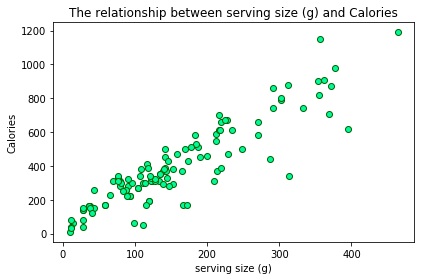

In [40]:
fig, ax = plt.subplots()
plt.scatter(x, y, facecolor='mediumspringgreen', edgecolor='darkgreen')
ax.set_xlabel('serving size (g)')
plt.ylabel('Calories')
ax.set_title('The relationship between serving size (g) and Calories')
fig.tight_layout()

#### 12. แปลงค่าปริมาณสารอาหาร ให้อยู่ในอัตราส่วนของ serving size (g) ที่เท่ากัน —เนื่องจากปริมาณสารอาหารในอาหารแต่ละชนิด มาจากปริมาณ serving size (g) ที่ต่างกัน ดังนั้น เราควรจะแปลงค่ามันให้เทียบมาจาก ปริมาณ serving size (g) ที่เท่าๆกัน โดยมีหลักคิดคือ —ถ้า ปริมาณ serving size = s, มีปริมาณสารอาหารในคอลัมน์ B = b ดังนั้น ที่ปริมาณ serving size = max_s จะมีปริมาณสารอาหารในคอลัมน์ B = b * max_s/s

- หาปริมาณ serving size (g) ที่สูงที่สุดในชุดข้อมูล และเก็บไว้ในตัวแปรชื่อ max_ss

In [41]:
import statistics
from collections import Counter

In [42]:
max_ss = max(df1['serving size (g)'])

In [43]:
max_ss

464.0

- แปลงค่าปริมาณสารอาหารในคอลัมน์ต่างๆ โดยเทียบกับ serving size (g) ที่สูงที่สุด

In [44]:
orig_serving_size = df1['serving size (g)'].copy()
df1[df1.select_dtypes(include=['float64']).columns] = df1[df1.select_dtypes(include=['float64']).columns]*max_ss
df1[df1.select_dtypes(include=['float64']).columns] = df1[df1.select_dtypes(include=['float64']).columns].div(orig_serving_size.values, axis='rows')

#### 13. ตรวจดูว่าข้อมูลมีค่าที่ต่ำหรือสูงผิดปกติ(outliers) หรือไม่

- วาด boxplot สำหรับข้อมูลทุกคอลัมน์ยกเว้นคอลัมน์แรกที่ไม่ใช่ข้อมูลตัวเลข โดยให้ boxplots ทุกอันอยู่ใน figure และ plot เดียวกัน

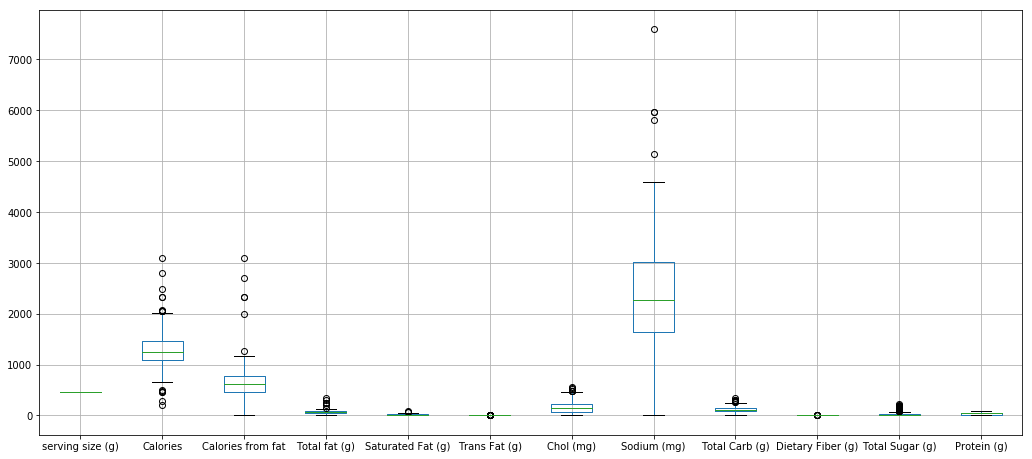

In [45]:
plt.figure();
df1.boxplot(column=['serving size (g)', 'Calories', 'Calories from fat', 'Total fat (g)', 'Saturated Fat (g)', 'Trans Fat (g)', 'Chol (mg)', 'Sodium (mg)', 'Total Carb (g)', 'Dietary Fiber (g)', 'Total Sugar (g)', 'Protein (g)', ])
plt.subplots_adjust(right=2.4, top = 1.6)
plt.show()

**หมายเหตุ:** data points ที่อยู่นอก boxplot จะถูกพิจารณาว่าเป็น outliers

- แปลงค่าข้อมูลไปเป็นค่า Z หรือ ค่ามาตรฐาน (standard value) เพื่อดูว่ามีค่าใดบ้างที่ต่ำกว่า -3 หรือสูงกว่า 3 หรือไม่

In [46]:
from scipy.stats import zscore

In [47]:
col = df1.select_dtypes(include=[np.number]).columns

In [48]:
df1[col].apply(zscore)

C:\Users\kik\Anaconda3\lib\site-packages\scipy\stats\stats.py:2248: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


,serving size (g),Calories,Calories from fat,Total fat (g),Saturated Fat (g),Trans Fat (g),Chol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Total Sugar (g),Protein (g)
1,NaN,-0.374276,-0.100068,-0.099859,-0.099201,1.209825,-0.122725,-0.590485,-0.563701,-0.460491,-0.413159,0.402347
2,NaN,-0.807168,-0.622698,-0.632233,-0.355552,1.358870,-0.160304,-0.683228,-0.464098,-0.398255,-0.384254,0.582510
3,NaN,-0.285198,0.003471,-0.016291,0.220472,1.621377,0.065983,-0.243095,-0.630395,-0.516091,-0.438981,0.523581
4,NaN,-0.676045,-0.468708,-0.466117,0.009704,1.203304,0.046079,-0.301390,-0.544046,-0.463215,-0.414424,0.698512
5,NaN,-0.212773,0.082139,0.079710,0.260966,1.542278,0.124327,-0.040517,-0.670849,-0.540862,-0.450485,0.645580
6,NaN,-0.180036,0.082139,0.079710,0.260966,1.542278,0.124327,-0.064417,-0.606417,-0.540862,-0.367195,0.645580
7,NaN,-0.277137,0.033609,0.039868,0.273060,2.138381,0.379492,-0.830740,-0.843941,-0.635599,-0.494483,1.059248
8,NaN,-0.594705,-0.348756,-0.349403,0.104851,1.830751,0.383064,-0.915239,-0.787136,-0.600104,-0.477999,1.173531
9,NaN,-0.220501,0.102162,0.092571,0.494307,1.973915,0.450890,-0.550502,-0.881634,-0.669936,-0.510431,1.107405
10,NaN,-0.507775,-0.248180,-0.240121,0.355148,2.130787,0.463008,-0.609373,-0.828147,-0.637184,-0.495220,1.283484


#### 14. ลบแถวข้อมูลที่มีoutliers อยู่

- พิมพ์ลิสต์ของ indice ของแถวของข้อมูลที่มี outliers อยู่ (อ้างอิง: https://pyformat.info/)

In [49]:
df1_zscore = df1[col].apply(zscore)

C:\Users\kik\Anaconda3\lib\site-packages\scipy\stats\stats.py:2248: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [50]:
def find_outlier(df1, df1_zscore):
    for col in df1.loc[:, 'serving size (g)':].columns:
        ind = df1_zscore.loc[(df1_zscore[col]>3) | (df1_zscore[col]<-3)].index.tolist()
        print ('Column name: {}, Row index: {}'.format(col, ind))
find_outlier(df1, df1_zscore)

Column name: serving size (g), Row index: []
Column name: Calories, Row index: [66, 124]
Column name: Calories from fat, Row index: [66, 124, 128, 131]
Column name: Total fat (g), Row index: [66, 124, 128, 131]
Column name: Saturated Fat (g), Row index: [107, 122]
Column name: Trans Fat (g), Row index: []
Column name: Chol (mg), Row index: []
Column name: Sodium (mg), Row index: [122]
Column name: Total Carb (g), Row index: [126]
Column name: Dietary Fiber (g), Row index: []
Column name: Total Sugar (g), Row index: [125]
Column name: Protein (g), Row index: []


**หมายเหตุ:** ลองเปรียบเทียบจำนวน outliers ในแต่ละคอลัมน์กับ boxplot ที่สร้างไว้ก่อนหน้านี้ จะพบว่าจำนวน data points ที่อยู่นอก boxplot จะใกล้เคียงกับจำนวน outliers ที่หาได้ด้วย Z-score

- รวบรวม indice ของแถวข้อมูลที่มี outliers อยู่และเก็บไว้ในตัวแปรชื่อ **outlier_ind_lst**

In [51]:
def collect_outlier_indice(df1, df1_zscore):
        item_list=[]
        seen = set(item_list)
        for col in df1.loc[:, 'serving size (g)':].columns:
                item_list = df1_zscore.loc[(df1_zscore[col]>3) | (df1_zscore[col]<-3)].index.tolist()
                for item in item_list:
                 #print(item)
                     if item not in seen:
                    #print(item)
                        seen.add(item)
                   #item_list.append(item)
        outlier_indice_lst = list(seen)
        #print(outlier_indice_lst)
        return outlier_indice_lst
        #return seen

- เรียกใช้ฟังก์ชัน collect_outlier_indice() โดยให้เก็บค่าที่คืนไว้ในตัวแปรชื่อ outlier_ind_lst

In [52]:
outlier_indice_lst = collect_outlier_indice(df1, df1_zscore)

In [53]:
outlier_indice_lst 

[128, 66, 131, 107, 122, 124, 125, 126]

- ทำการลบแถวข้อมูลที่มี outliers อยู่ออกจากชุดข้อมูล

In [54]:
df1 = df1.drop(outlier_indice_lst, axis = 0)
#reset index
df1.reset_index(drop=True)

,Nutrition facts,serving size (g),Calories,Calories from fat,Total fat (g),Saturated Fat (g),Trans Fat (g),Chol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Total Sugar (g),Protein (g)
0,WHOPPER® Sandwich,464.0,1134.222222,618.666667,68.740741,20.622222,2.577778,154.666667,1684.148148,84.207407,3.437037,18.903704,48.118519
1,w/o Mayo,464.0,931.726908,372.690763,40.995984,16.771084,2.795181,149.076305,1565.301205,91.309237,3.726908,20.497992,52.176707
2,WHOPPER® Sandwich with Cheese,464.0,1175.890411,667.397260,73.095890,25.424658,3.178082,182.739726,2129.315068,79.452055,3.178082,17.479452,50.849315
3,w/o Mayo,464.0,993.062731,445.166052,49.653137,22.258303,2.568266,179.778598,2054.612546,85.608856,3.424354,18.833948,54.789668
4,Bacon & Cheese WHOPPER® Sandwich,464.0,1209.768977,704.422442,78.099010,26.033003,3.062706,191.419142,2388.910891,76.567657,3.062706,16.844884,53.597360
5,BBQ Bacon WHOPPER® Sandwich,464.0,1225.082508,704.422442,78.099010,26.033003,3.062706,191.419142,2358.283828,81.161716,3.062706,21.438944,53.597360
6,DOUBLE WHOPPER® Sandwich,464.0,1179.661017,681.581921,76.022599,26.214689,3.932203,229.378531,1376.271186,64.225989,2.621469,14.418079,62.915254
7,w/o Mayo,464.0,1031.111111,501.621622,55.735736,23.687688,3.483483,229.909910,1267.987988,68.276276,2.786787,15.327327,65.489489
8,DOUBLE WHOPPER® Sandwich with Cheese,464.0,1206.153846,713.846154,78.769231,29.538462,3.692308,240.000000,1735.384615,61.538462,2.461538,13.538462,64.000000
9,w/o Mayo,464.0,1071.774648,548.957746,61.430986,27.447887,3.921127,241.802817,1659.943662,65.352113,2.614085,14.377465,67.966197


#### 15. วาด scatter plot เพื่อพิจารณาความสัมพันธ์ระหว่างปริมาณแคลลอรี่(Calories) และสารอาหารอื่นๆ โดยให้แบ่งเป็น subplots ที่มี 2 แถวและ 5 คอลัมน์
- Calories และ Calories from fat
- Calories และ Total fat (g)
- Calories และ Trans Fat (g)
- Calories และ Saturated Fat (g)
- Calories และ Chol (mg)
- Calories และ Sodium (mg)
- Calories และ Total Carb (g)
- Calories และ Dietary Fiber (g)
- Calories และ Total Sugar (g)
- Calories และ Protein (g)

<bound method Figure.tight_layout of <matplotlib.figure.Figure object at 0x000001CCC70C7908>>

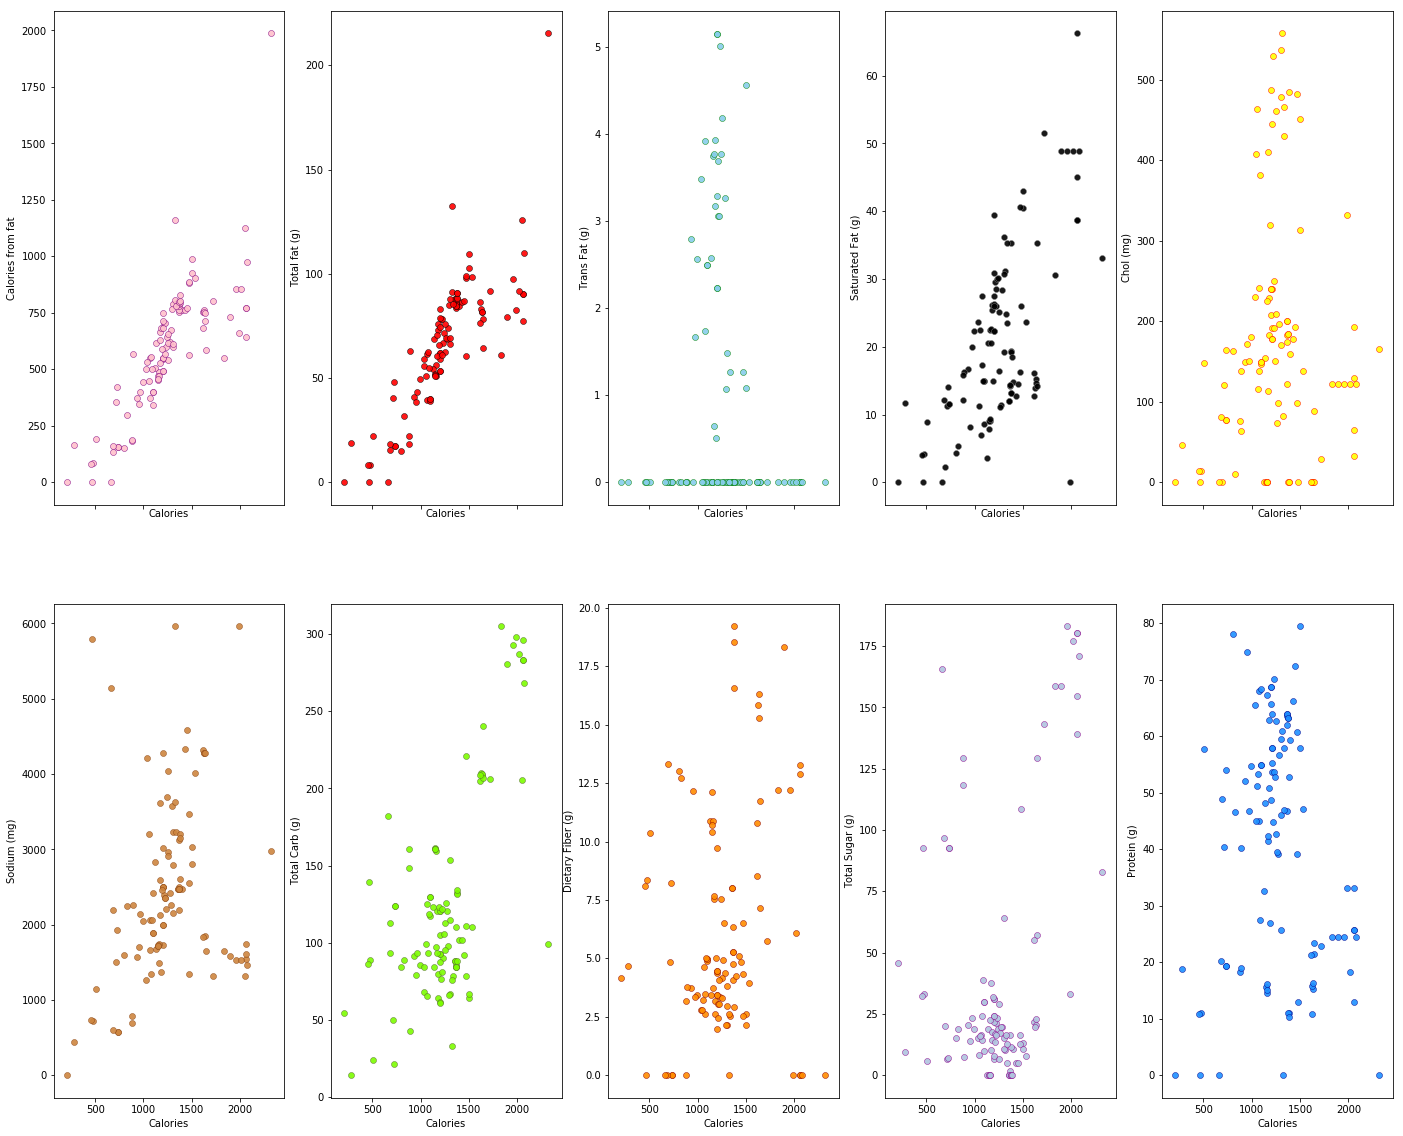

In [55]:
fig, axis = plt.subplots(2, 5,figsize=(24,20),sharex=True)
fig.tight_layout

axis[0,0].scatter(df1['Calories'], df1['Calories from fat'], facecolor='pink', edgecolor='purple', linewidth=0.5, alpha=0.9)
axis[0,0].set_xlabel('Calories')
axis[0,0].set_ylabel('Calories from fat')

axis[0,1].scatter(df1['Calories'], df1['Total fat (g)'],facecolor='red', edgecolor='black', linewidth=0.5, alpha=0.9)
axis[0,1].set_xlabel('Calories')
axis[0,1].set_ylabel('Total fat (g)')

axis[0,2].scatter(df1['Calories'], df1['Trans Fat (g)'], facecolor='skyblue', edgecolor='green', linewidth=0.5, alpha=0.9)
axis[0,2].set_xlabel('Calories')
axis[0,2].set_ylabel('Trans Fat (g)')

axis[0,3].scatter(df1['Calories'], df1['Saturated Fat (g)'], facecolor='black', edgecolor='gray', linewidth=0.5, alpha=0.9)
axis[0,3].set_xlabel('Calories')
axis[0,3].set_ylabel('Saturated Fat (g)')

axis[0,4].scatter(df1['Calories'], df1['Chol (mg)'],  facecolor='yellow', edgecolor='red', linewidth=0.5, alpha=0.9)
axis[0,4].set_xlabel('Calories')
axis[0,4].set_ylabel('Chol (mg)')

axis[1,0].scatter(df1['Calories'], df1['Sodium (mg)'], facecolor='peru', edgecolor='saddlebrown', linewidth=0.5, alpha=0.9)
axis[1,0].set_xlabel('Calories')
axis[1,0].set_ylabel('Sodium (mg)')

axis[1,1].scatter(df1['Calories'], df1['Total Carb (g)'], facecolor='lawngreen', edgecolor='darkolivegreen', linewidth=0.5, alpha=0.9)
axis[1,1].set_xlabel('Calories')
axis[1,1].set_ylabel('Total Carb (g)')

axis[1,2].scatter(df1['Calories'], df1['Dietary Fiber (g)'], facecolor='darkorange', edgecolor='darkred', linewidth=0.5, alpha=0.9)
axis[1,2].set_xlabel('Calories')
axis[1,2].set_ylabel('Dietary Fiber (g)')

axis[1,3].scatter(df1['Calories'], df1['Total Sugar (g)'], facecolor='lightsteelblue', edgecolor='darkmagenta', linewidth=0.5, alpha=0.9)
axis[1,3].set_xlabel('Calories')
axis[1,3].set_ylabel('Total Sugar (g)')

axis[1,4].scatter(df1['Calories'], df1['Protein (g)'],  facecolor='dodgerblue', edgecolor='darkblue', linewidth=0.5, alpha=0.9)
axis[1,4].set_xlabel('Calories')
axis[1,4].set_ylabel('Protein (g)')

fig.tight_layout

#### 16. คำนวณค่าสหสัมพันธ์(correlation) ระหว่าง Calories และสารอาหารอื่นๆ

In [56]:
df1.corr()

,serving size (g),Calories,Calories from fat,Total fat (g),Saturated Fat (g),Trans Fat (g),Chol (mg),Sodium (mg),Total Carb (g),Dietary Fiber (g),Total Sugar (g),Protein (g)
serving size (g),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Calories,NaN,1.000000,0.812712,0.822283,0.646010,-0.085540,0.084718,0.239843,0.653532,0.141014,0.393024,-0.077712
Calories from fat,NaN,0.812712,1.000000,0.997938,0.591970,0.003266,0.248982,0.350755,0.140939,0.025091,0.001975,0.061773
Total fat (g),NaN,0.822283,0.997938,1.000000,0.598124,0.001835,0.253822,0.360761,0.155252,0.016475,0.013415,0.057563
Saturated Fat (g),NaN,0.646010,0.591970,0.598124,1.000000,0.247203,0.341692,-0.072024,0.299835,-0.082805,0.448246,0.107863
Trans Fat (g),NaN,-0.085540,0.003266,0.001835,0.247203,1.000000,0.210098,-0.076534,-0.302235,-0.274617,-0.207570,0.532725
Chol (mg),NaN,0.084718,0.248982,0.253822,0.341692,0.210098,1.000000,0.247899,-0.339560,-0.411966,-0.277989,0.551358
Sodium (mg),NaN,0.239843,0.350755,0.360761,-0.072024,-0.076534,0.247899,1.000000,-0.018308,-0.024985,-0.279453,0.025126
Total Carb (g),NaN,0.653532,0.140939,0.155252,0.299835,-0.302235,-0.339560,-0.018308,1.000000,0.277663,0.752920,-0.514923
Dietary Fiber (g),NaN,0.141014,0.025091,0.016475,-0.082805,-0.274617,-0.411966,-0.024985,0.277663,1.000000,-0.059299,-0.212769


**หมายเหตุ:** เมื่อพิจารณาจากตารางค่าสหสัมพันธ์จะพบว่า:
- Calories from fat, Total fat (g), Saturated Fat (g), Chol (mg), Sodium (mg), Total Carb (g), และ Protein (g) มีค่าสหสัมพันธ์กับ Calories เกินกว่า 0.60
- Calories from fat และ Total fat (g) มีค่าสหสัมพันธ์กัน 0.99 ซึ่งเสมือนเป็นค่าเดียวกัน
- ค่าปริมาณไขมัน Total fat (g) สามารถแยกเป็น Trans fat (g) และ Saturated fat (g) ซึ่งเราจะใช้สองค่านี้แทน Total fat (g)
- Calories from fat และ Total fat (g) มีค่าสหสัมพันธ์กัน 0.99 ซึ่งเสมือนเป็นค่าเดียวกัน ดังนั้นเราจะตัด Calories from fat ออกเช่นกัน

### 3. Regression Analysis

จากของการทำ data wrangling and pre-processing ในขั้นตอนก่อนหน้านี้ ทำให้เราสามารถสร้างสมการถดถอยชนิด
หลายตัวแปรได้ดังนี้

Y = b0 + b1• X1 + b2 • X2 + b3 • X3 + b4 • X4 + b5 • X5 + b6 • X6 + b7 • X7

โดยที่
- Y = ’Calories’
- X1 = ’Saturated Fat (g)’
- X2 = ’Trans Fat (g)’
- X3 = ’Chol (mg)’
- X4 = ’Sodium (mg)’
- X5 = ’Total Carb (g)’
- X6 = ’Total Sugar (g)’
- X7 = ’Protein (g)’

#### 1. สร้างสมการถดถอยจากชุดข้อมูล และเก็บไว้ในตัวแปรชื่อ model1

In [57]:
import statsmodels.formula.api as smf

In [58]:
y = df1['Calories']
X = df1[['Saturated Fat (g)', 'Trans Fat (g)','Chol (mg)','Sodium (mg)','Total Carb (g)', 'Total Sugar (g)','Protein (g)' ]]

In [59]:
model1 = smf.ols(formula='y~X', data=df1).fit()

#### 2. แสดงค่าสัมประสิทธิ์ของสมการสำหรับ model1

In [60]:
model1.params

Intercept    145.039878
X[0]          20.664067
X[1]         -44.634055
X[2]          -0.322857
X[3]           0.068221
X[4]           4.576009
X[5]          -3.123829
X[6]           3.786273
dtype: float64

#### 3. แสดงข้อมูลทางสถิติของ model1

In [61]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     63.43
Date:                Wed, 14 Mar 2018   Prob (F-statistic):           5.83e-34
Time:                        19:58:14   Log-Likelihood:                -707.22
No. Observations:                 108   AIC:                             1430.
Df Residuals:                     100   BIC:                             1452.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    145.0399     76.427      1.898      0.061      -6.590     296.670
X[0]          20.6641      1.911     10.811      0.000      16.872      24.456
X[1]         -44.6341     14.381     -3.104      0.002     -73.166     -16.102
X[2]          -0.3229      0.166     -1.945      0.055      -0.652       0.006
X[3]           0.0682      0.017      4.058      0.000       0.035       0.102
X[4]           4.5760      0.432     10.584      0.000       3.718       5.434
X[5]          -3.1238      0.630     -4.956      0.000      -4.374      -1.873
X[6]           3.7863      1.235      3.067      0.003       1.337       6.236
==============================================================================
Omnibus:                       96.461   Durbin-Watson:                   1.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1525.490
Skew:                           2.715   Prob(JB):                         0.00
Kurtosis:                      20.593   Cond. No.                     1.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**หมายเหตุ:** จากค่าสรุปจะพบว่า ตัวแปรทำนายทุกตัวมีค่า p-value ต่ำกว่า 0.05 และค่ Adjusted R-squared เท่ากับ 0.945 ซึ่งเป็นค่าสูง แต่อย่างไรก็ตาม ค่า p-value ของ intercept เท่ากับ 0.087 ซึ่งสูงกว่า 0.05 ดังนั้นเราจะลองตัดค่าสัมประสิทธิ์ออก โดยบังคับให้สมการถดถอยตัดที่จุดกำเนิด เช่น (0, 0, 0, 0, 0, 0, 0)

#### 4. ทดลองสร้างสมการถดถอย โดยไม่ใช้ค่า intercept —ใช้สมการ formula =′ y X - 1′ และให้เก็บไว้ในตัวแปรชื่อ model2

In [62]:
model2 = smf.ols(formula='y~X-1', data=df1).fit()

#### 5. แสดงค่าสัมประสิทธิ์ของสมการสำหรับ model2

In [63]:
model2.params

X[0]    20.851062
X[1]   -46.539925
X[2]    -0.349911
X[3]     0.082598
X[4]     4.914172
X[5]    -3.015981
X[6]     5.240656
dtype: float64

In [64]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     825.7
Date:                Wed, 14 Mar 2018   Prob (F-statistic):           4.13e-86
Time:                        19:58:19   Log-Likelihood:                -709.13
No. Observations:                 108   AIC:                             1432.
Df Residuals:                     101   BIC:                             1451.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X[0]          20.8511      1.933     10.786      0.000      17.016      24.686
X[1]         -46.5399     14.530     -3.203      0.002     -75.363     -17.717
X[2]          -0.3499      0.167     -2.089      0.039      -0.682      -0.018
X[3]           0.0826      0.015      5.435      0.000       0.052       0.113
X[4]           4.9142      0.399     12.318      0.000       4.123       5.706
X[5]          -3.0160      0.636     -4.743      0.000      -4.277      -1.755
X[6]           5.2407      0.980      5.346      0.000       3.296       7.185
==============================================================================
Omnibus:                      102.604   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1906.749
Skew:                           2.907   Prob(JB):                         0.00
Kurtosis:                      22.747   Cond. No.                     2.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**หมายเหตุ:** ผลลัพธ์จากการตัดค่า intercept ออก พบว่า ค่า p-Value ของตัวแปรทำนายทุกตัวมีค่าต่ำกว่า 0.05 และค่า Adjusted R-squared เพิ่มขึ้นเป็น 0.987 อย่างไรก็ตาม สมการถดถอยที่ไม่มีค่า intercept อยู่จะหมายถึงสมการที่ปริมาณแคลลอรี่ขึ้นอยู่กับปริมาณสารอาหารในตัวแปรที่กำหนดเท่านั้น แต่ในความเป็นจริงอาจจะขึ้นอยู่
กับปริมาณสารอาหารอื่นๆที่ไม่ได้อยู่ในสมการก็ได้ดังนั้นสมการจึงไม่สะท้อนถึงข้อเท็จจริงเท่าไหร่—ตรวจดูการประเมินสมรรถนะในเนื้อหาส่วนถัดไป

### 4. Performance Evaluation

นอกจากค่า p-Value และค่า Adjusted R-squared ที่ใช้สำหรับการบ่งชี้ถึงโมเดลสมการถดถอยที่ดีแล้ว เราสามารถใช้ค่าความคลาดเคลื่อนจากการทำนายในการประเมินสมรรถนะของแบบจำลองเช่นกัน ซึ่งค่าที่รู้จักกันดีคือ Root Mean Squared Error (RMSE)

#### 1. ทำนายค่า Calories จาก model1 และ model2

In [65]:
p1 = model1.predict(X)
p2 = model2.predict(X)

 #### 2. คำนวณค่า root mean squared error ของ model1 และ model2

In [66]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [67]:
rmse1 = sqrt(mean_squared_error(y, p1))

In [68]:
rmse1

168.91003470930596

In [69]:
rmse2 = sqrt(mean_squared_error(y, p2))

In [70]:
rmse2

171.9247370129217

In [71]:
print ('RMSE Model 1 :' , rmse1)
print ('RMSE Model 2 :' , rmse2)

RMSE Model 1 : 168.91003470930596
RMSE Model 2 : 171.9247370129217


**หมายเหตุ:** จะเห็นว่าเมื่อตัดค่า intercept ออก ถึงแม้ว่าจะทำให้ค่า Adjusted R-squared สูงขึ้น แต่ก็ทำให้ค่า RMSE สูงขึ้นเช่นกัน ในกรณีนี้ สำหรับสมการถดถอยเชิงเส้นชนิดหลายตัวแปร **model1** ดีกว่า **model2** เพราะ **model1** คำนึงถึงค่า intercept และมีค่าความคลาดเคลื่อนจากการทำนาย (RMSE) ต่ำกว่า ถึงแม้ว่าค่า Adjusted R-squared ของมันจะต่ำกว่า **model2**